<a href="https://colab.research.google.com/github/MohamedTheSobhy/Analyze-A-B-Test-Results/blob/main/Transaction%20Value%20Threshold%20Stress-Test%20for%20Emerging%20VC%20Markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Egyptian VC Market Simulation (2025) ===
Total Market Value: $604.0M
Median Deal Value: $3.42M
Deals > $30M (Illustrative Near-Misses): 1
Deals > $40M (TVT Capture): 0


/tmp/ipython-input-85304136.py:112: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(


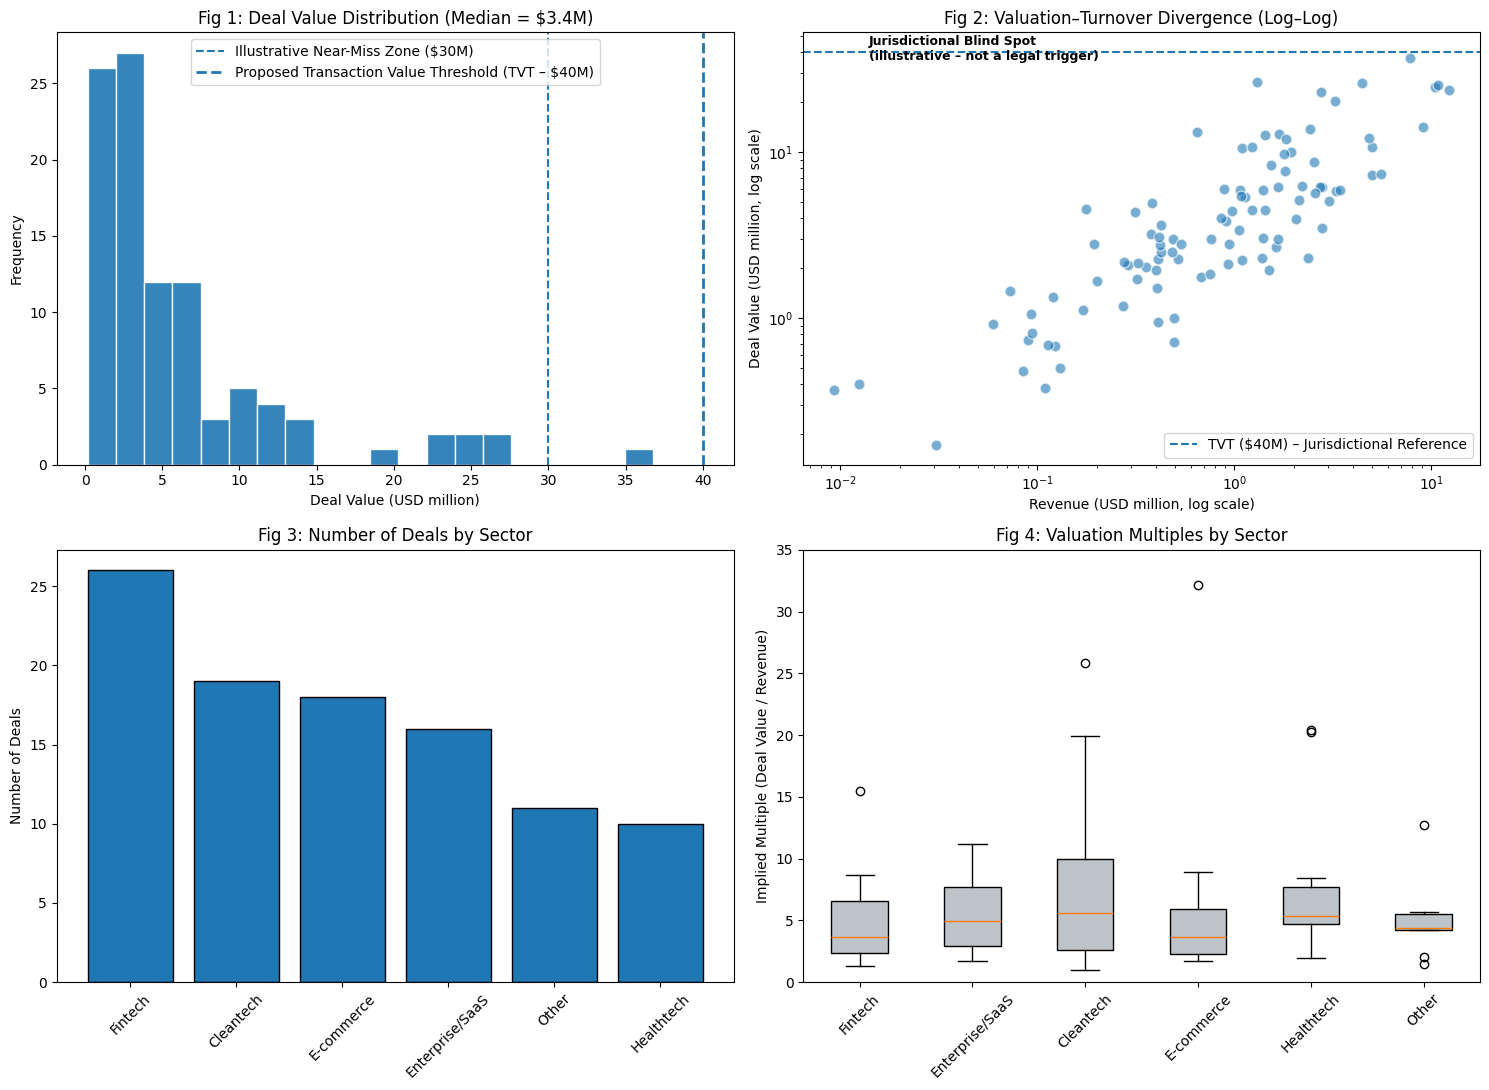

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. CONFIGURATION
# =========================
np.random.seed(42)

n_deals = 100
total_value_target = 604  # USD million
sigma = 1.2
median_target = 3.4

TVT_THRESHOLD = 40   # Proposed Transaction Value Threshold
WARNING_ZONE = 30    # Illustrative Near-Miss Zone

# =========================
# 2. DATA GENERATION
# =========================
mu = np.log(median_target)
deal_values = np.random.lognormal(mean=mu, sigma=sigma, size=n_deals)
deal_values *= total_value_target / deal_values.sum()

multiples = np.random.lognormal(mean=1.5, sigma=0.8, size=n_deals)
revenues = deal_values / multiples

sector_labels = ["Fintech", "Enterprise/SaaS", "Cleantech", "E-commerce", "Healthtech", "Other"]
sector_probs = [0.28, 0.18, 0.15, 0.12, 0.10, 0.17]
sectors = np.random.choice(sector_labels, size=n_deals, p=sector_probs)

df = pd.DataFrame({
    "DealValue_USD_M": deal_values,
    "Revenue_USD_M": revenues,
    "ValuationMultiple": multiples,
    "Sector": sectors
})

# =========================
# 3. STATISTICS
# =========================
median_actual = df["DealValue_USD_M"].median()
deals_above_30m = (df["DealValue_USD_M"] > WARNING_ZONE).sum()
deals_above_40m = (df["DealValue_USD_M"] > TVT_THRESHOLD).sum()

print("=== Egyptian VC Market Simulation (2025) ===")
print(f"Total Market Value: ${df['DealValue_USD_M'].sum():.1f}M")
print(f"Median Deal Value: ${median_actual:.2f}M")
print(f"Deals > $30M (Illustrative Near-Misses): {deals_above_30m}")
print(f"Deals > $40M (TVT Capture): {deals_above_40m}")

# =========================
# 4. PLOTTING
# =========================
fig, axes = plt.subplots(2, 2, figsize=(15, 11))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# ---- Fig 1: Deal Value Distribution ----
axes[0, 0].hist(df["DealValue_USD_M"], bins=20, edgecolor='white', alpha=0.9)
axes[0, 0].axvline(WARNING_ZONE, linestyle='--', linewidth=1.5,
                   label='Illustrative Near-Miss Zone ($30M)')
axes[0, 0].axvline(TVT_THRESHOLD, linestyle='--', linewidth=2,
                   label='Proposed Transaction Value Threshold (TVT – $40M)')
axes[0, 0].set_title(f"Fig 1: Deal Value Distribution (Median = ${median_actual:.1f}M)")
axes[0, 0].set_xlabel("Deal Value (USD million)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()

# ---- Fig 2: Valuation–Turnover Divergence ----
axes[0, 1].scatter(
    df["Revenue_USD_M"],
    df["DealValue_USD_M"],
    alpha=0.6,
    edgecolors='white',
    s=60
)

axes[0, 1].axhline(
    TVT_THRESHOLD,
    linestyle='--',
    linewidth=1.5,
    label='TVT ($40M) – Jurisdictional Reference'
)

axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')

axes[0, 1].set_title("Fig 2: Valuation–Turnover Divergence (Log–Log)")
axes[0, 1].set_xlabel("Revenue (USD million, log scale)")
axes[0, 1].set_ylabel("Deal Value (USD million, log scale)")

# ✅ FIXED ANNOTATION (INSIDE PLOT, SAFE FOR PRINTING)
axes[0, 1].text(
    df["Revenue_USD_M"].min() * 1.5,
    TVT_THRESHOLD * 0.9,
    "Jurisdictional Blind Spot\n(illustrative – not a legal trigger)",
    fontsize=9,
    fontweight='bold'
)

axes[0, 1].legend(loc='lower right')

# ---- Fig 3: Number of Deals by Sector ----
sector_counts = df["Sector"].value_counts()
axes[1, 0].bar(sector_counts.index, sector_counts.values, edgecolor='black')
axes[1, 0].set_title("Fig 3: Number of Deals by Sector")
axes[1, 0].set_ylabel("Number of Deals")
axes[1, 0].tick_params(axis='x', rotation=45)

# ---- Fig 4: Valuation Multiples by Sector ----
box_data = [df[df["Sector"] == s]["ValuationMultiple"] for s in sector_labels]
axes[1, 1].boxplot(
    box_data,
    labels=sector_labels,
    patch_artist=True,
    boxprops=dict(facecolor='#bdc3c7')
)
axes[1, 1].set_title("Fig 4: Valuation Multiples by Sector")
axes[1, 1].set_ylabel("Implied Multiple (Deal Value / Revenue)")
axes[1, 1].set_ylim(0, 35)
axes[1, 1].tick_params(axis='x', rotation=45)

# =========================
# 5. FINAL OUTPUT
# =========================
plt.tight_layout()
plt.savefig("Egypt_VC_Analysis_2025.png", dpi=300)
plt.show()
